### Библиотеки для построения графиков и интерактивного интерфейса

#### Matplotlib

Самая популярная и базовая библиотека для построения графиков - это matplotlib. Это огромная библиотека, и изучать ее возможности можно неделями, но на самом деле главное - разобраться в основных ее понятиях, остальное - уже финтифлюшки. Matplotlib необходимо отдельно устанавливать:

    pip install matplotlib
        или
    conda install matplotlib
    
(в анаконде он уже может быть установлен, в колабе точно установлен). 

**Архитектура Matplotlib**

Matplotlib имеет три основных слоя: слой нижнего уровня (backend), слой рисунков и слой скриптов. Слой нижнего уровня содержит три интерфейсных класса: канва рисунка (figure canvas), определяющая область рисунка, прорисовщик (renderer), умеющий рисовать на этой канве, и событие (event), обрабатывающее ввод пользователя вроде щелчков мыши. Слой рисунков знает, как рисовать с помощью Renderer'а и рисовать на канве. Все, что находится на рисунке Matplotlib, является экземпляром слоя рисунка (artist). Засечки, заголовок, метки – все это индивидуальные объекты слоя рисунков. Слой скриптов – это облегченный интерфейс, который очень полезен для ежедневного применения.

Два объекта, о которых необходимо знать для работы с графиками - это Figure & Axes. 

**Figure** - это контейнер самого верхнего уровня, та область, на которой все нарисовано. Таких областей может быть несколько, каждая из которых может содержать несколько контейнеров Axes.
**Axes** - это та область на которой чаще всего и отражаются графики (данные в виде графиков), а также все вспомогательные атрибуты (линии сетки, метки, указатели и т.д.). 
Каждая область Axes содержит XAxis и YAxis. Они содержат, деления, метки и прочие вспомогательные атрибуты.

Когда собираемся нарисовать график, сперва заводим экземпляр класса Figure, а потом к нему специальным методом добавляем область для будущего графика. 

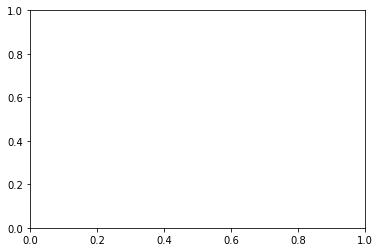

In [1]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

plt.show()

Можно убедиться, что эти фигуры разные, если поменять их цвет:

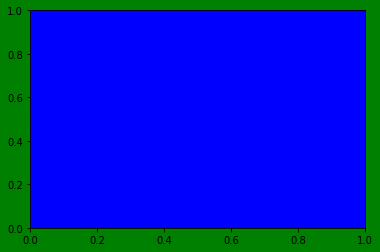

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set(facecolor='green')
ax.set(facecolor='blue')
plt.show()

Вообще метод set() есть и у фигуры, и у области графика, и там можно устанавливать очень много всего разного. Причем обычно есть варианты вида set(Title=''...) vs set_title(). 

Наиболее простой способ по-быстрому установить визуальные настройки графика - специальная форматированная строка у метода plot(); подробное описание того, что в ней можно указать, есть в [документации библиотеки](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). 

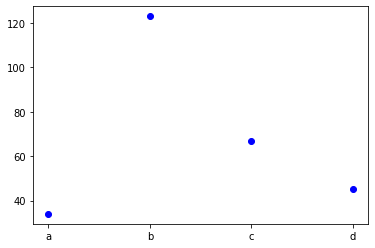

In [4]:
X = ['a', 'b', 'c', 'd']
Y = [34, 123, 67, 45]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, Y, 'bo')
plt.show()

Таким образом, как же строить сами графики на области графика? Один самый простой метод уже написан вверху: это plot(). На самом деле, можно использовать этот метод и не создавая отдельный экземпляр, но тогда большинство тонких настроек не будет доступно:

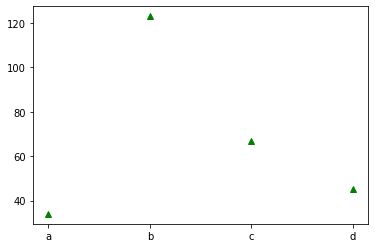

In [5]:
plt.plot(X, Y, '^g')
plt.show()

Какие еще есть методы в matplotlib?

- ax.scatter(X, Y)
- ax.bar(x, height(y), width, bottom, align)
- ax.hist(x, bins)
- ax.pie(sizes, labels=labels, autopct='%1.1f%%')

Можете сами посмотреть, как они устроены и как выглядят. 

Какие базовые настройки стоит знать, когда строим графики?

- У Figure есть size: fig = plt.figure(figsize=(x, y))
- У ax можно установить заголовок: ax.set_title('Title')
- У графиков можно менять цвет, форму, линии, размер шрифтов;
- Можно устанавливать xticks (значения по оси х) и yticks;
- Можно сохранять график с помощью savefig();
- Можно сразу устанавливать весь стиль для графика с помощью plt.style.use(['...']) (посмотреть, какие доступны, можно с помощью plt.style.available)

**Подграфики**

Matplotlib позволяет строить много axes внутри одной figure: для этого есть два разных способа. Более гибкий - это использовать метод add_subplot():

In [ ]:
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)

Первая цифра из трех - это номер ряда, вторая - номер строки, а третья - индекс подграфика (matplotlib воспринимает область графика как табличку). 

Каждый подграфик можно настраивать как угодно; графики не обязаны занимать всю область figure, можно их рисовать как хочется. 

Более простой (и менее гибкий) способ - это использовать метод subplots():

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols =2 )

axes[0,0].set(title='axes[0,0]')
axes[0,1].set(title='axes[0,1]')
axes[1,0].set(title='axes[1,0]')
axes[1,1].set(title='axes[1,1]')

for ax in axes.flat:
    ax.set(...)

plt.show()

На самом деле этот же метод удобнее использовать и для одиночного графика:

    fig, ax = plt.subplots()

**Трехмерные графики**

В matplotlib есть подбиблиотека, которая позволяет рисовать графики в трехмерном пространстве. Подробно рассматривать не будем, но самый простой пример кода выглядит так:

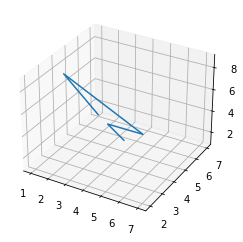

In [11]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X, Y, Z = [1, 2, 7, 3, 6], [7, 3, 2, 5, 2], [1, 9, 7, 3, 6]
ax.plot(X, Y, Z)
plt.show()

#### Seaborn

Seaborn - это библиотека, которая построена на базе matplotlib и очень хорошо с ней взаимодействует. Главная цель Seaborn - это визуализация данных для машинного обучения, поэтому seaborn умеет работать с датафреймами pandas (скоро посмотрим); также у seaborn ужасно красивые палитры. :) Сейчас посмотрим только их, но экстенсивно будем пользоваться этой библиотекой на курсе по машинному обучению. 

Seaborn тоже, конечно, нужно устанавливать. 

        pip install seaborn
        
Импортируется он обычно как sns. 

У него есть возможность автоматически настраивать масштаб графика в зависимости от целей, с которыми вы его создаете:

    sns.set_context('paper', 'notebook', 'talk', 'poster')
    
(Poster сделает крупный график, например). По умолчанию используется notebook.

Самое клевое - это палитры, которые в самом seaborn очень разнообразны, плюс можно собирать их самостоятельно из номеров цветов. Как посмотреть, какие цвета есть в seaborn вообще?

In [13]:
import seaborn as sns

palette = sns.color_palette("br")  # напечатать какую-нибудь ерунду вместо названия палитры, и в ошибке сиборн послушно вывалит все свои палитры

ValueError: br is not a valid palette name

Дальше уже можно эти цвета выбирать и смотреть:

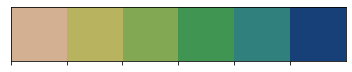

In [14]:
palette = sns.color_palette('gist_earth_r')
sns.palplot(palette)

Что умеет строить seaborn:

- sns.barplot(x=x, y=y, palette=..., ci=None)  # ci - чтобы убрать черную полосу, это стандартное отклонение
- sns.pointplot(x=x,y=y, color='lime', alpha=0.8)
- sns.jointplot(x=x, y=y, kind="kde", height=7)

Поскольку тема построения графиков неисчерпаема, я всячески вас побуждаю самостоятельно копаться в документации и на стэковерфлоу, чтобы рисовать все более красивые графики. :) Они здорово помогут вам при защите диплома...

#### ipywidgets

Последнее, что мы с вами посмотрели - совсем уже необязательная, но просто клевая библиотека для интерактивных виджетов в юпитере. В ней есть, вообще говоря, много всего, мы посмотрели буквально пару вещей. 

Библиотеку, разумеется, тоже нужно устанавливать (pip install ipywidgets). Работает она только в .ipynb (для чего и предназначена). 

Сами виджеты - это экземпляры одного из классов, доступных в библиотеке. Все доступные виджеты можно изучить по [документации](https://ipywidgets.readthedocs.io/en/latest/). 

Как сделать прогрессбар:

In [15]:
from ipywidgets import IntProgress
from IPython.display import display
import time

max_count = 100

f = IntProgress(min=0, max=max_count) # создаем экземпляр класса
display(f) # отображаем наш экземпляр

for i in range(100):
    f.value += 1 # signal to increment the progress bar
    time.sleep(.1)

IntProgress(value=0)

В настройках можно, конечно, сделать и так, чтобы проценты отображались поверх ползунка, и всякое прочее (цвет поменять там). 

Также с помощью ipywidgets можно сделать интерактивный график. Допустим, у нас есть какая-то функция, которая строит график:

In [17]:
from random import randrange
def myfunc(x, n):
    x = [randrange(0, x + 1) for i in range(n)]
    y = [i ** 2 for i in x]
    sns.barplot(x=x, y=y, color='lime', ci=None)
    plt.show()

Теперь можно к ней применить метод interact, который позволит в интерактивном режиме выбирать ее параметры, и функция будет график перестраивать без необходимости перезапускать ячейку и вручную вписывать параметры. 

In [18]:
from ipywidgets import interact, IntSlider

interact(myfunc, x=IntSlider(min=1, max=30, step=1, value=1), n=list(range(1, 11)))

interactive(children=(IntSlider(value=1, description='x', max=30, min=1), Dropdown(description='n', options=(1…

<function __main__.myfunc(x, n)>